# Statistics - Hypothesis Testing - Clinical Trial of a New Drug

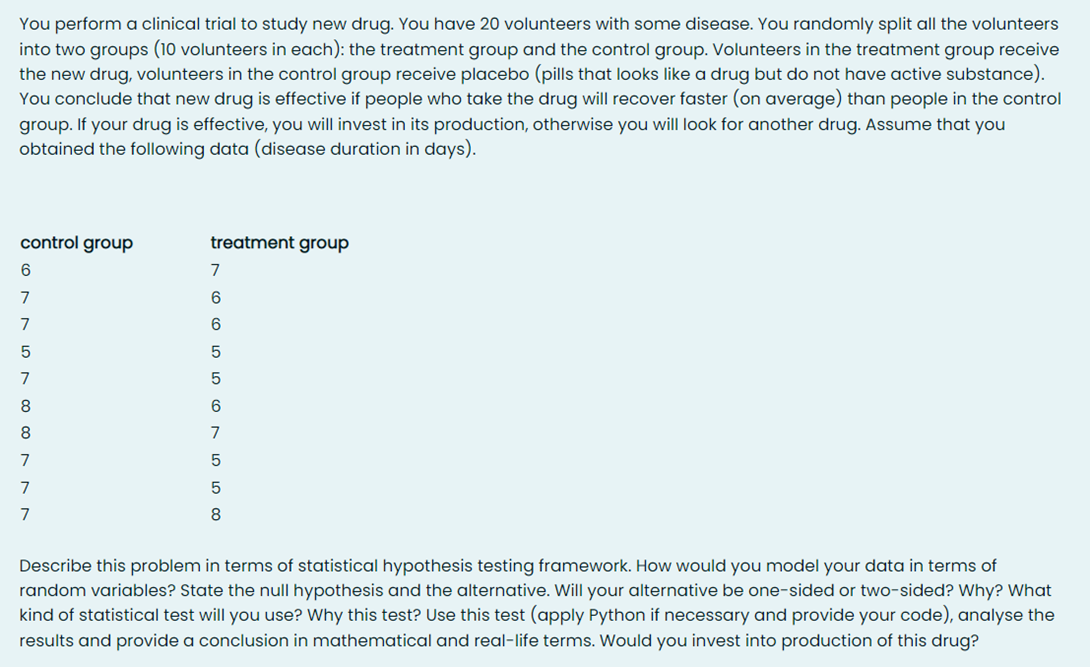

As every volunteer has an equal chance of being selected to be in control group or in treatment group, we have two simple random samples.

Usually the significance level is set between 0.01 and 0.05. Our experiment deals with vital health problems, so we will fix significance level at 0.01.

Our null hypothesis is that the new drug doesn't influence the speed of recovery.
The alternative hypothesis is that with the new drug recovery is faster than without this drug. So our alternative is one-sided, as we're only interested in the new drug's effectiveness.

$$H_0: \mu_1 = \mu_2$$
$$H_a: \mu_1 < \mu_2$$

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

control_group = [6, 7, 7, 5, 7, 8, 8, 7, 7, 7]
treatment_group = [7, 6, 6, 5, 5, 6, 7, 5, 5, 8]

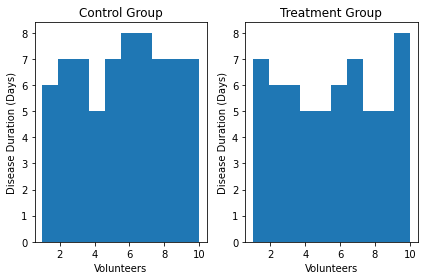

In [30]:
x = np.arange(1, 11, 1)

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.hist(x, weights=control_group)
plt.title('Control Group')
plt.xlabel('Volunteers')
plt.ylabel('Disease Duration (Days)')
 
plt.subplot(1, 2, 2)
plt.hist(x, weights=treatment_group)
plt.title('Treatment Group')
plt.xlabel('Volunteers')
plt.ylabel('Disease Duration (Days)')
 
plt.tight_layout()

Already on these histograms we can't really see improvement in disease duration among the treatment group.

In [30]:
control_mean = np.mean(control_group)
treatment_mean = np.mean(treatment_group)

control_std = np.std(control_group, ddof=1)
treatment_std = np.std(treatment_group, ddof=1)

control_size = len(control_group)
treatment_size = len(treatment_group)

print('Control group mean is '+ str(control_mean))
print('Treatment group mean is '+ str(treatment_mean))
print('Control group standard deviation is ' + str(control_std))
print('Treatment group standard deviation is ' + str(treatment_std))
print('Control group sample size is ' + str(control_size))
print('Treatment group sample size is ' + str(treatment_size))

Control group mean is 6.9
Treatment group mean is 6.0
Control group standard deviation is 0.8755950357709131
Treatment group standard deviation is 1.0540925533894598
Control group sample size is 10
Treatment group sample size is 10


We will use two-sample t-test, as the observations in one sample are independent of the observations in the other sample and the data in both samples was obtained using a random sampling method.

In [32]:
ttest = (control_mean - treatment_mean) / np.sqrt(control_std**2/control_size + treatment_std**2/treatment_size)
print(ttest)

2.076923076923078


It would be more efficient to apply ttest_ind function:

In [29]:
scipy.stats.ttest_ind(control_group, treatment_group, equal_var=False, alternative='less')

Ttest_indResult(statistic=2.076923076923078, pvalue=0.9735471459686509)

As 0.97 > 0.01, we can not reject the null hypothesis. Which means that the new drug may appear not to be effective.
Therefore, it is too risky to invest in its production without performing more tests (if the new tests prove its effectiveness).